# Week 6 assignment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import mdtraj as md
import pandas as pd

In [3]:
dihedrals = np.loadtxt('./COLVAR', skiprows = 5)
time = dihedrals[:,0]
phi1 = dihedrals[:,1]
psi1 = dihedrals[:,2]

In [4]:
print(time)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 9.9998e+04 9.9999e+04 1.0000e+05]


In [5]:
print(phi1)

[-1.257768 -2.714986 -2.332921 ... -2.558425 -2.40343  -2.678744]


In [6]:
print(psi1)

[2.877951 2.43286  2.672415 ... 2.764508 2.856036 2.586141]


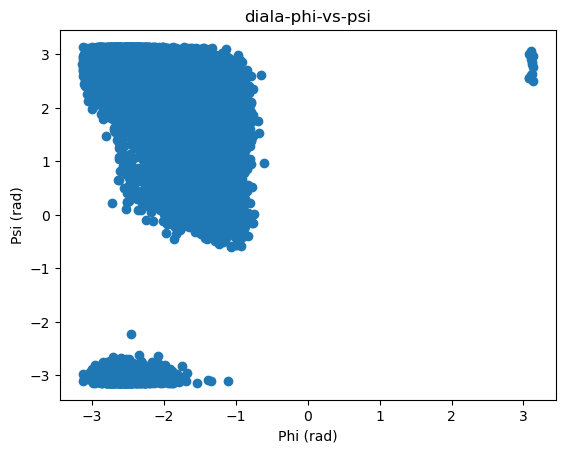

In [7]:
plt.scatter(phi1, psi1, marker = 'o')
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.title('diala-phi-vs-psi')
plt.savefig('../../../figures/diala-phi-vs-psi.png')
plt.show()

In [8]:
traj = md.load_xtc('./traj_comp.xtc', top='./confout.gro')
print(traj)

<mdtraj.Trajectory with 100001 frames, 22 atoms, 3 residues, and unitcells>


In [9]:
phi2 = md.compute_phi(traj, periodic=True)
psi2 = md.compute_psi(traj, periodic=True)

-3.1323397159576416
3.1353344917297363


/state/partition1/job-26530853/ipykernel_3981603/573987779.py:6: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


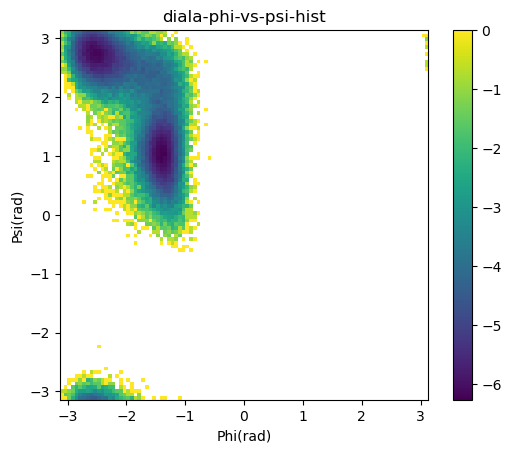

In [10]:
# compute a 2D histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi2[1].flatten(), psi2[1].flatten(), bins = 100)
print(xedges[0])
print(xedges[-1])
H = np.transpose(H)
H = -np.log(H)
plt.imshow(H, interpolation = 'nearest', origin = 'lower', extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi(rad)')
plt.ylabel('Psi(rad)')
plt.colorbar()
plt.title('diala-phi-vs-psi-hist')
plt.savefig('../../../figures/diala-phi-vs-psi-hist.png')

## Calculation of Standard deviation of phi and psi

In [10]:
len_phi1 = len(phi1)
len_psi1 = len(psi1)
print(len_phi1)
print(len_psi1)

100001
100001


In [11]:
print(max(phi1))
print(max(psi1))

3.135335
3.141537


In [12]:
phi1_av = sum(phi1)/len(phi1)
psi1_av = sum(psi1)/len(psi1)
print(phi1_av)
print(psi1_av)

-1.8793014730252486
1.8074864808551874


In [13]:
phi1_std = (sum((e - phi1_av)**2 for e in phi1) / len_phi1)**0.5
psi1_std = (sum((e - psi1_av)**2 for e in psi1) / len_psi1)**0.5

In [14]:
print("Standard Deviation for phi", phi1_std)
print("Standard Deviation for psi", psi1_std)

Standard Deviation for phi 0.5538315442462027
Standard Deviation for psi 1.0248981197422666
